In [1]:
!pip install multidict
!pip install -U spacy
!python -m spacy download fr_core_news_sm


     |████████████████████████████████| 160 kB 5.3 MB/s 
     |████████████████████████████████| 6.0 MB 4.5 MB/s 
     |████████████████████████████████| 42 kB 1.2 MB/s 
     |████████████████████████████████| 628 kB 44.6 MB/s 
     |████████████████████████████████| 451 kB 48.4 MB/s 
     |████████████████████████████████| 10.1 MB 38.8 MB/s 
     |████████████████████████████████| 181 kB 47.3 MB/s 
  Attempting uninstall: catalogue
    Found existing installation: catalogue 1.0.0
    Uninstalling catalogue-1.0.0:
      Successfully uninstalled catalogue-1.0.0
  Attempting uninstall: srsly
    Found existing installation: srsly 1.0.5
    Uninstalling srsly-1.0.5:
      Successfully uninstalled srsly-1.0.5
  Attempting uninstall: thinc
    Found existing installation: thinc 7.4.0
    Uninstalling thinc-7.4.0:
      Successfully uninstalled thinc-7.4.0
  Attempting uninstall: spacy
    Found existing installation: spacy 2.2.4
    Uninstalling spacy-2.2.4:
      Successfully uninstalled s

In [2]:
!pip install spacy-langdetect

     |████████████████████████████████| 998 kB 5.2 MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.7-py3-none-any.whl size=993430 sha256=bb3a7cd690acb18efeb3eb98709e17bf3ee101331a7ec4939ec91ac38409ec98
  Stored in directory: /root/.cache/pip/wheels/89/79/3b/9885ae7f4308f73c514f96d8574d40d7d8173a27731b674013
Successfully built langdetect


In [3]:
# évidemment un truc marche pas en ce moment
!python -m spacy download fr_dep_news_trf

     |████████████████████████████████| 400.7 MB 22 kB/s 
     |████████████████████████████████| 1.2 MB 5.4 MB/s 
     |████████████████████████████████| 51 kB 139 kB/s 
     |████████████████████████████████| 1.1 MB 35.9 MB/s 
     |████████████████████████████████| 2.9 MB 23.4 MB/s 
     |████████████████████████████████| 596 kB 44.1 MB/s 
     |████████████████████████████████| 3.3 MB 43.6 MB/s 
     |████████████████████████████████| 59 kB 6.4 MB/s 
     |████████████████████████████████| 895 kB 55.2 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
✔ Download and installation successful
You can now load the package via spacy.load('fr_dep_news_trf')


In [4]:
# https://github.com/explosion/spacy-models/releases/download/fr_dep_news_trf-3.2.0/fr_dep_news_trf-3.2.0-py3-none-any.whl

In [ ]:
# substitution sur une zone accessible
#!pip install http://ecmn-tln.fr/fr_dep_news_trf-3.2.0-py3-none-any.whl

----
## Ne pas oublier de relancer l'environnement
----

In [ ]:
stockageEntree = "/content/DistorsionCom/OUT"
stockageSortie = "/content/DistorsionCom/OUT"


---
Personnalisation

> Ces cellules permettent de réaliser les traitements à partir de son propre espace de stockage. A n'exécuter que dans ce cas en adaptant les dossiers d'entrée et sortie. NE PAS EXECUTER SAUF A VOULOIR PERSONNALISER LES TRAITEMENTS.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Récupérer les sorties sur son drive (créer un dossier "OUT")
stockageSortie = "/content/drive/MyDrive/OUT"

In [3]:
# Récupérer les entrées sur son drive
stockageEntree = "/content/drive/MyDrive/OUT"

---

In [ ]:
import multidict as multidict
import os, pickle, re, spacy
from os import path
from collections import Counter
from spacy.language import Language
from spacy_langdetect import LanguageDetector
import pandas as pd
from urllib import parse
from outils import isPartner

In [ ]:
def get_lang_detector(nlp, name):
    return LanguageDetector()

In [ ]:
# A ne pas lancer plusieurs fois !!
Language.factory("language_detector", func=get_lang_detector)

<function __main__.get_lang_detector>

---

# Prétraitements 

## Détection de langue
> Les procédures de lemmatisation et autres fonctions TAL sont fonction de la langue. Seul le modèle FR est chargé. Les autres langues seront exclues.

In [ ]:
  # deux modèles de données spacy sont utilisés du fait de leur efficacité relative à la détection des entités
    # 'fr_core_news_sm' fonctionne mieux pour la détection des entités
  tal = spacy.load('fr_core_news_sm')


In [ ]:
tal.add_pipe('language_detector', last=True) # Permet de détecter la langue

In [ ]:
aGarder, aVirer = dict([]), dict([])

In [ ]:
# modif au 16/11 :  rajout de la détection de langue
for ndf in os.listdir(stockageEntree + "/OUT/ContenusSites/"):
  fichierEntree = stockageEntree + "/OUT/ContenusSites/" + ndf
  if not ndf.startswith('.') and "backlinks" not in ndf:
    with open (fichierEntree, 'rb') as  fictemp:
      soupe = pickle.load(fictemp)
    ndf = ndf.replace('.pkl', '')
    if ndf not in aVirer.keys():
      aVirer[ndf] = []
    if ndf not in aGarder.keys():
      aGarder[ndf] = []
    for url in soupe.keys():
      tousLesContenus = soupe [url] 
      doc = tal(str(tousLesContenus))
      if not doc._.language["language"] == "fr": # exclusion si fr non détecté
        print("pas fr : ", url, soupe [url] )
        aVirer[ndf].append(url)
      else:
        aGarder[ndf].append(url)

pas fr :  http://heliotel.net 403 Forbidden 
pas fr :  http://pradet-vacances.com Not Acceptable! An appropriate representation of the requested resource could not be found on this server. This error was generated by Mod_Security.
pas fr :  http://campingdupindegalle.com 403 Forbidden 
pas fr :  http://hotel-escapade.com redirection  
pas fr :  http://labastide-decharlotte.fr 403 Forbidden 
pas fr :  http://mercure.com Book a hotel online with Accor  
pas fr :  http://ibis.com Book a hotel online with Accor  
pas fr :  http://accorhotels.com ALL - Accor Live Limitless Home - Accor Rooms & Guests  Room 1  Travellers Promo code Hotels Apartments & Villas Restaurants & Bars Meetings & Events Experiences Day use Our current offers Relax, unwind—or get out there and see it all—at unforgettable destinations throughout North & Central America. Book Now  Relax, unwind—or get out there and see it all—at unforgettable destinations throughout North & Central America. Book Now        Earn points a

# Supression des extrêmes


In [ ]:
aGarderTemp, aVirerTemp = aGarder, aVirer



---


Ne pas exécuter la ligne ci-dessous. Sauvegarde temporaire pour ne pas avoir à rexécuter la précédente lors des tests.

In [ ]:
# aGarder, aVirer = aGarderTemp, aVirerTemp



---



In [ ]:
stats = dict()
for ndf in os.listdir(stockageEntree + "/OUT/ContenusSites/"):
  if not ndf.startswith('.')  and "backlinks" not in ndf:
    fichierEntree = stockageEntree + '/OUT/ContenusSites/' + ndf
    with open (fichierEntree, 'rb') as  fictemp: #pour ouvrir les contenus 
      soup=pickle.load(fictemp)
    ndf = ndf.replace('.pkl', '')
    data  = [len(soup[url]) for url in soup.keys() if url not in aVirer[ndf]]
    donnees = pd.DataFrame.from_dict(data)
    stats [ndf.replace('.pkl', '')] = donnees.describe()

 # stats contient la description statistique des données fondée sur la taille
 # de celle-ci. Cette variable servira a exclure les url dont la variation
 # à la moyenne est trop importante : trop ou pas assez sont considérés comme
 # des singularités. Cela peut provenir de la forme choisie pour la page (grande
 # page qui contient "tout" avec un ascenceur interminable ou par ex. une page composée
 # par des appels url en js que le collecteur ne reconstruit pas) 

In [ ]:
stats

{'Gouv':                  0
 count     6.000000
 mean   1214.666667
 std     611.679219
 min     418.000000
 25%     954.000000
 50%    1073.000000
 75%    1474.000000
 max    2202.000000, 'Hebergement':                   0
 count    104.000000
 mean    2289.163462
 std     1880.202727
 min       17.000000
 25%      881.500000
 50%     1793.500000
 75%     3109.000000
 max    10234.000000, 'Services':                   0
 count    107.000000
 mean    2263.747664
 std     2595.852094
 min       19.000000
 25%      762.000000
 50%     1568.000000
 75%     2671.000000
 max    17486.000000, 'locations':                  0
 count    32.000000
 mean   2040.593750
 std    1301.716134
 min      76.000000
 25%    1130.750000
 50%    1994.000000
 75%    2699.500000
 max    5396.000000, 'mairies':                  0
 count     7.000000
 mean    753.857143
 std     563.578574
 min     161.000000
 25%     271.500000
 50%     667.000000
 75%    1144.500000
 max    1617.000000, 'oTourism':           

In [ ]:
# suppression des extrêmes
seuil = 1.3 
# le code qui suit sert à exclure les extrêmes (taille de collecte) hors zone 
# entre la valeur moyenne sur la collecte +/- sa valeur valeur multipliée par le seuil
# il ne faut pas réitérer la boucle plusieurs fois au risque de voir exclure tout le monde

# Si le seuil est modifié il faut ré-exécuter la cellule d'initialisation des statistiques

for ndf in os.listdir(stockageEntree + "/OUT/ContenusSites/"):
  if not ndf.startswith('.') and "backlinks" not in ndf:
    
    fichierEntree = stockageEntree +  '/OUT/ContenusSites/' +ndf
    with open (fichierEntree, 'rb') as  fictemp: #pour ouvrir les contenus 
      soup=pickle.load(fictemp)
    ndf = ndf.replace('.pkl', '')
    if ndf not in aGarder.keys():
      aGarder[ndf] = []
    if ndf not in aVirer.keys():
      aVirer[ndf] = []
    for url in soup.keys():
      # autour de la moyenne +/- sa valeur divisée par le seuil
      if (len(soup[url]) > stats[ndf][0]['mean'] - stats[ndf][0]['mean']//seuil) and (len(soup[url]) < stats[ndf][0]['mean'] + stats[ndf][0]['mean']//seuil):
          # print( len(soup [url]), stats [ndf] [0]['mean']/seuil)
          if url not in aGarder[ndf]:
            aGarder[ndf].append(url)
            if url in aVirer [ndf]:
              aVirer[ndf].remove(url)
          else:
            pass
      else:
        aVirer[ndf].append(url)
        if url in aGarder[ndf]:
          aGarder[ndf]. remove (url)
    print (ndf, "  ", stats[ndf][0]['count'], " exclus ", len(aVirer[ndf]))

    data  = [len(soup[url]) for url in aGarder[ndf] if url not in aVirer[ndf]]
    # mise à jour des stats
    
    donnees = pd.DataFrame.from_dict(data)
    stats [ndf.replace('.pkl', '')] = donnees.describe()


Hebergement    104.0  exclus  65
organisations    20.0  exclus  8
oTourism    24.0  exclus  10
Gouv    6.0  exclus  1
locations    32.0  exclus  11
mairies    7.0  exclus  4
restauration    35.0  exclus  17
parcs    10.0  exclus  2
Services    107.0  exclus  43


In [ ]:
print (aVirer["parcs"])

['http://www.ecrins-parcnational.fr/', 'http://www.forets-parcnational.fr/fr']


In [ ]:
stats

{'Gouv':                  0
 count     5.000000
 mean   1017.200000
 std     418.618203
 min     418.000000
 25%     954.000000
 50%     954.000000
 75%    1192.000000
 max    1568.000000, 'Hebergement':                  0
 count    78.000000
 mean   1922.423077
 std     943.881700
 min     573.000000
 25%    1220.750000
 50%    1785.500000
 75%    2559.500000
 max    3992.000000, 'Services':                  0
 count    73.000000
 mean   1743.643836
 std     846.240877
 min     533.000000
 25%    1013.000000
 50%    1599.000000
 75%    2281.000000
 max    3934.000000, 'locations':                 0
 count    25.00000
 mean   1994.68000
 std     797.59115
 min     731.00000
 25%    1274.00000
 50%    2006.00000
 75%    2597.00000
 max    3336.00000, 'mairies':                  0
 count     5.000000
 mean    699.800000
 std     445.706967
 min     190.000000
 25%     353.000000
 50%     667.000000
 75%    1050.000000
 max    1239.000000, 'oTourism':                  0
 count    14.00000



---



# Traitement des fichiers produits par le scrapper
> ndf est le fichier produit par le scapper. On le charge le spacytraite pour visualiser

In [ ]:
tempVerb = dict() # fonction du ndf
tempNoun = dict()
tempAdj = dict()
tempLoc = dict()
tempMisc = dict()
tempPer = dict()
tempOrg = dict()
dicoEtiquettage = dict()
aEviter = dict()
verbes = dict() #listes à remplir avec verbes/adj/noms/entités trouvés 
adjectifs  = dict() 
noms = dict()

adverbes = dict()
tempAdv = dict()

In [ ]:
  tal = spacy.load('fr_core_news_sm')
    # 'fr_dep_news_trf' fonctionne mieux pour le reste
  tal1 = spacy.load('fr_dep_news_trf', disable = ['tagger', 'parser', 'textcat'])

In [ ]:
for ndf in os.listdir(stockageEntree + "/OUT/ContenusSites/"):
  fichierEntree = stockageEntree + '/OUT/ContenusSites/' + ndf
  if not ndf.startswith('.')  and "backlinks" not in ndf:
    # chargement des données collectées par le scrapeur
    with open (fichierEntree, 'rb') as  fictemp: #pour ouvrir les contenus 
      soupe = pickle.load(fictemp)
    ndf = ndf.replace('.pkl', '')
    
    # nettoyage
    tousLesContenus = """""" 
    for url in aGarder[ndf]:
      tousLesContenus += soupe[url] + "\n" 
    print(ndf, len(tousLesContenus))

Hebergement 150027
organisations 19710
oTourism 21696
Gouv 5091
locations 49892
mairies 3504
restauration 29600
parcs 11569
Services 127359


In [ ]:

for ndf in os.listdir(stockageEntree + "/OUT/ContenusSites/"):
  fichierEntree = stockageEntree + '/OUT/ContenusSites/' + ndf
  if not ndf.startswith('.')  and "backlinks" not in ndf:
    # chargement des données collectées par le scrapeur
    with open (fichierEntree, 'rb') as  fictemp: #pour ouvrir les contenus 
      soupe=pickle.load(fictemp)
    ndf = ndf.replace('.pkl', '')
    
    # nettoyage
    tousLesContenus = """""" # une longue chaine qui contiendra tous les cocd lntenus de la ndf
    for url in aGarder[ndf]:
      tousLesContenus += soupe[url] + "\n" 
    try:
      doc = tal(str(tousLesContenus))
    except:
      print("planté", ndf)
      print(len(tousLesContenus))
      
    # Si l'environnement n'a pas été redémarré, le code plante ici
    dicoEtiquettage[ndf] = dict()

    entites = []
    for entity in doc.ents:
      if entity.label_ not in dicoEtiquettage[ndf].keys():
        dicoEtiquettage[ndf][entity.label_] = []
        dicoEtiquettage[ndf][entity.label_].append(entity.text)
        entites.append(entity.label_)
      else:
        dicoEtiquettage[ndf][entity.label_].append(entity.text)
      #entites.append(entity.text)
      #dicoEtiquettage [ndf] [entity.label_] = entites #dico: [étiquettage de entité donné par spacy] = la liste des entités
    if ndf not in aEviter.keys():
      aEviter[ndf] = []
    if 'LOC' in dicoEtiquettage[ndf].keys():
        aEviter[ndf] += dicoEtiquettage[ndf]['LOC']
    if 'MISC' in dicoEtiquettage [ndf].keys():
        aEviter[ndf] += dicoEtiquettage[ndf]['MISC']
    if 'PER' in dicoEtiquettage [ndf].keys():
        aEviter[ndf] += dicoEtiquettage [ndf]['PER']
    if 'ORG' in dicoEtiquettage [ndf].keys():
        aEviter[ndf] += dicoEtiquettage[ndf]['ORG']
      # utilisation de l'autre modèle
    doc = tal1(str(tousLesContenus).lower())

    if ndf not in verbes.keys():
        verbes[ndf] = []
    if ndf not in adjectifs.keys():
        adjectifs[ndf] = []
    if ndf not in noms.keys():
        noms[ndf] = []
    
    if ndf not in adverbes.keys(): #ADVERBES
        adverbes[ndf] = []
    for truc in doc: 
        if truc.text not in aEviter[ndf] and truc.text.lower() not in aEviter[ndf]: 
          if len(truc.text)>2:
            if truc.pos_ == "VERB":
              verbes[ndf].append(truc.lemma_) #ajoute à la liste (.lemma_ fait la lemmatisation)
              dicoEtiquettage[ndf][truc.pos_] = verbes[ndf] #ajoute dans le dico: ["VERB"] = la liste des verbes
            if truc.pos_ == "ADJ":
              adjectifs[ndf].append(truc.lemma_) 
              dicoEtiquettage [ndf][truc.pos_] = adjectifs[ndf] #dico:["ADJ"] = la liste des adjectifs
            if truc.pos_ == "NOUN":
              noms[ndf].append(truc.lemma_)
              dicoEtiquettage[ndf][truc.pos_] = noms[ndf] #dico: ["NOUN"] = la liste des noms  
            
            if truc.pos_ == "ADV": 
              adverbes[ndf].append(truc.lemma_)
              dicoEtiquettage[ndf][truc.pos_] = adverbes[ndf] #dico: ["ADV"] = la liste des adverbes

    for cle in dicoEtiquettage[ndf]: 
        if cle == "VERB":
          tempVerb[ndf] = Counter(dicoEtiquettage[ndf][cle])
        if cle == "NOUN":
          tempNoun[ndf] = Counter(dicoEtiquettage[ndf][cle])
        if cle == "ADJ":
          tempAdj[ndf] = Counter(dicoEtiquettage[ndf][cle])
        if cle == "LOC":
          tempLoc[ndf] = Counter(dicoEtiquettage[ndf][cle])
        if cle == "MISC":
          tempMisc[ndf] = Counter(dicoEtiquettage[ndf][cle])
        if cle == "PER":
          tempPer[ndf] = Counter(dicoEtiquettage[ndf][cle])
        if cle == "ORG":
          tempOrg[ndf] = Counter(dicoEtiquettage[ndf][cle])
        if cle == "ADV":
          tempAdv[ndf] = Counter(dicoEtiquettage[ndf][cle])
    

In [ ]:
print(tempLoc[ndf])

Counter({'Hyères': 45, 'France': 20, 'Giens': 17, 'Var': 13, 'Découvrez': 11, 'Porquerolles': 10, 'Toulon': 10, 'Saint-Tropez': 7, 'Oisans': 7, 'Côtes de Provence': 7, 'Samedi': 6, 'Orcières': 6, 'Venez': 5, 'Kitesurf': 5, 'Marseille': 5, 'Paris': 5, 'Venosc': 5, 'Miléade': 5, 'Accueil': 4, 'Méditerranée': 4, 'La Seyne-sur-Mer': 4, 'Parc National de Port-Cros': 3, 'HYERES': 3, 'Novembre': 3, 'Lavandou': 3, 'Frac': 3, 'Activités': 3, 'Port-Cros': 3, 'Donator': 3, 'Cavalaire': 3, 'Europe': 3, 'Seyne-sur-Mer': 3, 'Serre Chevalier': 3, 'Chaillol': 3, 'vallée du Champsaur': 3, 'Malcros': 3, 'Parc National des Ecrins': 3, 'Alpes': 3, 'Horaires': 3, 'Repas': 3, 'Carqueiranne': 3, 'rade de Toulon': 3, 'Ruche': 3, 'Besoin': 2, 'Mail': 2, 'Port Cros': 2, 'Partez': 2, 'Coupole': 2, 'Vendredi': 2, 'Conditions': 2, '•': 2, 'méditerranée': 2, 'Consultez': 2, 'Sellerie Nautique': 2, 'Galerie': 2, 'sculpteurs': 2, 'Massillon': 2, 'Fresh': 2, "Bourg-d'Oisans": 2, 'Bourg': 2, 'Valence': 2, 'Genève': 2, 

# Les partenaires

> Les partenaires sont les sites cités par le site d'origine, citant eux-même le site. Les motivations de citation étant aussi variées que les motivations de partenariat nous tentons de regrouper ces partenaires selon les catégories identifiées.

Les sites des partenaires ont été identifiés par le logiciel Hyphe (Médialab)

Note: si l'url n'a pas été collecté dans la phase d'initialisation (scrapping) alors son champ lexical n'est pas utilisé

In [ ]:
with open (stockageEntree + "/Ressources/NIVEAU1-PNPC.csv", "r") as partners:
  donnee= partners.readlines()

In [ ]:
partenaires = []
for lig in donnee[1:]:
  urls = lig.split(";")[2]
  partenaires.extend(urls.split())

In [ ]:
partenairesPropres = []

In [ ]:
for url in partenaires:
  url = url.strip()
  url = url.replace('"', "")

  urlP = parse.urlparse(url)
  partenairesPropres.append(urlP.scheme + '://' + urlP.hostname)

In [ ]:
tempGram = dict() # fonction du ndf et de la catGram

dicoEtiquettagePartners = dict()

verbesPartners = dict() #listes à remplir avec verbes/adj/noms/entités trouvés 
adjectifsPartners  = dict() 
nomsPartners = dict()
adverbesPartners = dict()

In [ ]:
tousLesContenusPartners = """"""
dicoEtiquettagePartners = dict()
for ndf in os.listdir(stockageEntree + "/OUT/ContenusSites/"):
  fichierEntree = stockageEntree + '/OUT/ContenusSites/' +ndf
  if not ndf.startswith('.') and "backlinks" not in ndf:
    # chargement des données collectées par le scrapeur
    with open(fichierEntree, 'rb') as  fictemp: #pour ouvrir les contenus 
      soupe=pickle.load(fictemp)
    ndf = ndf.replace('.pkl', '')
    
    # nettoyage
    tousLesContenus = """""" # une longue chaine qui contiendra tous les contenus du type ndf
    for url in aGarder[ndf]:
      if isPartner(url,partenairesPropres):
        tousLesContenus += soupe[url] + "\n" 
        tousLesContenusPartners += soupe[url] + "\n" 
    doc = tal(str(tousLesContenus))

      
    # Si l'environnement n'a pas été redémarré, le code plante ici
    dicoEtiquettagePartners[ndf] = dict()

    entites = []
    for entity in doc.ents:
      if entity.label_ not in dicoEtiquettagePartners[ndf].keys():
        dicoEtiquettagePartners[ndf][entity.label_] = []
        dicoEtiquettagePartners[ndf][entity.label_].append(entity.text)
        entites.append(entity.label_)
      else:
        dicoEtiquettagePartners[ndf][entity.label_].append(entity.text)
      #entites.append(entity.text)
      #dicoEtiquettage [ndf] [entity.label_] = entites #dico: [étiquettage de entité donné par spacy] = la liste des entités
    if 'LOC' in dicoEtiquettagePartners[ndf].keys():
        aEviter[ndf] = dicoEtiquettagePartners[ndf]['LOC']
    if 'MISC' in dicoEtiquettagePartners[ndf].keys():
        aEviter[ndf] += dicoEtiquettagePartners [ndf]['MISC']
    if 'PER' in dicoEtiquettagePartners[ndf].keys():
        aEviter[ndf] += dicoEtiquettagePartners [ndf]['PER']
    if 'ORG' in dicoEtiquettagePartners[ndf].keys():
        aEviter[ndf] += dicoEtiquettagePartners[ndf]['ORG']
      # utilisation de l'autre modèle plus précis sur les identifications grammaticales dans notre contexte
    doc = tal1(str(tousLesContenusPartners).lower())

    if ndf not in verbesPartners.keys():
        verbesPartners[ndf] = []
    if ndf not in adjectifsPartners.keys():
        adjectifsPartners[ndf] = []
    if ndf not in nomsPartners.keys():
        nomsPartners[ndf] = []
    
    if ndf not in adverbesPartners.keys(): #ADVERBES
        adverbesPartners[ndf] = []
    # extraction des lemmes et des étiquettes
    for truc in doc: 
        if truc.text not in aEviter[ndf] and truc.text.lower() not in aEviter[ndf]: 
          if len(truc.text)>2:
            if truc.pos_ == "VERB":
              verbesPartners[ndf].append(truc.lemma_) #ajoute à la liste (.lemma_ fait la lemmatisation)
              dicoEtiquettagePartners[ndf][truc.pos_] = verbesPartners[ndf] #ajoute dans le dico: ["VERB"] = la liste des verbes
            if truc.pos_ == "ADJ":
              adjectifsPartners[ndf].append(truc.lemma_) 
              dicoEtiquettagePartners[ndf][truc.pos_] = adjectifsPartners[ndf] #dico:["ADJ"] = la liste des adjectifs
            if truc.pos_ == "NOUN":
              nomsPartners[ndf].append(truc.lemma_)
              dicoEtiquettagePartners[ndf][truc.pos_] = nomsPartners[ndf] #dico: ["NOUN"] = la liste des noms  
            
            if truc.pos_ == "ADV": 
              adverbesPartners[ndf].append(truc.lemma_)
              dicoEtiquettagePartners[ndf][truc.pos_] = adverbesPartners[ndf] #dico: ["ADV"] = la liste des adverbes

    tempGram = dict()
    for cle in dicoEtiquettagePartners[ndf]:
      if ndf not in tempGram.keys():
        tempGram[ndf] = dict()
      if cle not in tempGram [ndf] .keys():
        tempGram[ndf][cle] = Counter(dicoEtiquettagePartners[ndf][cle])
      else: # facultatif on devrait jamais passer là
        print("wtf ?")

In [ ]:
# Le champ lexical global 
doc = tal(str(tousLesContenusPartners))

champLexPartners  = dict()
aEviterPartn = []
entites = []
for entity in doc.ents:
  if entity.label_ not in champLexPartners.keys():
        champLexPartners[entity.label_] = []
        champLexPartners[entity.label_].append(entity.text)
        entites.append(entity.label_)
  else:
        champLexPartners [entity.label_].append(entity.text)
      #entites.append(entity.text)
      #dicoEtiquettage [ndf] [entity.label_] = entites #dico: [étiquettage de entité donné par spacy] = la liste des entités
  for cat in champLexPartners.keys():
    if cat in ['LOC', 'MISC', 'PER', 'ORG']:
      aEviterPartn += champLexPartners[cat]

In [ ]:
doc = tal1(str(tousLesContenusPartners).lower())
dicoEtiquettagePartnersCat = dict()
verbesPartners = []
adjectifsPartners = []
nomsPartners = []
adverbesPartners = []
for truc in doc: 
    if truc.text not in aEviterPartn and truc.text.lower() not in aEviterPartn: 
          if len(truc.text)>2:
            if truc.pos_ == "VERB":
              verbesPartners.append(truc.lemma_) #ajoute à la liste (.lemma_ fait la lemmatisation)
              dicoEtiquettagePartnersCat[truc.pos_] = verbesPartners  #ajoute dans le dico: ["VERB"] = la liste des verbes
            if truc.pos_ == "ADJ":
              adjectifsPartners.append(truc.lemma_) 
              dicoEtiquettagePartnersCat[truc.pos_] = adjectifsPartners  #dico:["ADJ"] = la liste des adjectifs
            if truc.pos_ == "NOUN":
              nomsPartners.append(truc.lemma_)
              dicoEtiquettagePartnersCat[truc.pos_] = nomsPartners  #dico: ["NOUN"] = la liste des noms  
            
            if truc.pos_ == "ADV": 
              adverbesPartners .append(truc.lemma_)
              dicoEtiquettagePartnersCat[truc.pos_] = adverbesPartners  #dico: ["ADV"] = la liste des adverbes


In [ ]:
tempGramPartners = dict()
for cle in dicoEtiquettagePartnersCat.keys():
  if cle not in tempGramPartners.keys():
    tempGramPartners[cle] = Counter(dicoEtiquettagePartnersCat[cle])
  else: # facultatif on devrait jamais passer là
      print ("wtf ?")  

# Sauvegarde des traitements

In [ ]:
fichierDeSortie = stockageSortie + '/OUT/ContenusTraites/' + 'Partners.pkl'
with open (fichierDeSortie, 'wb') as  fictemp: #on met tous les contenus dans pickle
  pickle.dump(tempGramPartners, fictemp)

In [ ]:
fichierDeSortie = stockageSortie + '/OUT/ContenusTraites/' + "verbesPartners.pkl"
with open (fichierDeSortie, 'wb') as  fictemp: #on met tous les contenus dans pickle
  pickle.dump(verbesPartners, fictemp)

fichierDeSortie = stockageSortie + '/OUT/ContenusTraites/' + 'nomsPartners.pkl'
with open (fichierDeSortie, 'wb') as  fictemp: #on met tous les contenus dans pickle
  pickle.dump(nomsPartners, fictemp)

fichierDeSortie = stockageSortie + '/OUT/ContenusTraites/' + 'adjectifsPartners.pkl'
with open (fichierDeSortie, 'wb') as  fictemp: #on met tous les contenus dans pickle
  pickle.dump(adjectifsPartners, fictemp)

fichierDeSortie = stockageSortie + '/OUT/ContenusTraites/' + 'adverbesPartners.pkl'
with open (fichierDeSortie, 'wb') as  fictemp: #on met tous les contenus dans pickle
  pickle.dump(adverbesPartners, fictemp)

In [ ]:
fichierDeSortie = stockageSortie + '/OUT/ContenusTraites/' +'PartnersParCat.pkl'
with open (fichierDeSortie, 'wb') as  fictemp: #on met tous les contenus dans pickle
  pickle.dump(dicoEtiquettagePartnersCat, fictemp)


In [ ]:
fichierDeSortie = stockageSortie + '/OUT/ContenusTraites/' +'Partners.pkl'
with open (fichierDeSortie, 'wb') as  fictemp: #on met tous les contenus dans pickle
  pickle.dump(dicoEtiquettagePartners, fictemp)

In [ ]:
fichierDeSortie = stockageSortie + '/OUT/ContenusTraites/' +'stats.pkl'
with open (fichierDeSortie, 'wb') as  fictemp: #on met tous les contenus dans pickle
  pickle.dump(stats, fictemp)


In [ ]:
fichierDeSortie = stockageSortie + '/OUT/ContenusTraites/' +"verbesSites.pkl"
with open (fichierDeSortie, 'wb') as  fictemp: #on met tous les contenus dans pickle
  pickle.dump(verbes, fictemp)

fichierDeSortie = stockageSortie + '/OUT/ContenusTraites/' +'nomsSites.pkl'
with open (fichierDeSortie, 'wb') as  fictemp: #on met tous les contenus dans pickle
  pickle.dump(noms, fictemp)

fichierDeSortie = stockageSortie + '/OUT/ContenusTraites/' +'adjectifsSites.pkl'
with open (fichierDeSortie, 'wb') as  fictemp: #on met tous les contenus dans pickle
  pickle.dump(adjectifs, fictemp)

fichierDeSortie = stockageSortie + '/OUT/ContenusTraites/' +'adverbesSites.pkl'
with open (fichierDeSortie, 'wb') as  fictemp: #on met tous les contenus dans pickle
  pickle.dump(adverbes, fictemp)

In [ ]:
dicoEtiquettagePartners.keys()

dict_keys(['Hebergement', 'organisations', 'oTourism', 'Gouv', 'locations', 'mairies', 'restauration', 'parcs', 'Services'])

# Tests des représentations

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from PIL import Image
from urllib import parse


def makeImage(text):
    wc = WordCloud(background_color="white", max_words=100,width=800, height=400)
    wc.generate_from_frequencies(text)

    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.show()


In [ ]:
temp = ["veuillez preservation pizzas mimosas découvrez venez jouez visitez écoutez lisez" ]

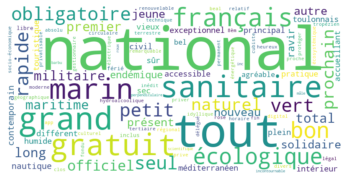

In [ ]:
makeImage(tempGramPartners ['ADJ'])

In [ ]:
for key in tempAdv.keys():
  print("Adverbes les plus courants pour la catégorie : ", key)
  makeImage(tempAdv[key])
  print("\n\n\n")

for key in tempLoc.keys():
  print("Localisations les plus courants pour la catégorie : ", key)
  makeImage(tempLoc[key])
  print("\n\n\n")

for key in tempOrg.keys():
  print("Organisations les plus courantes pour la catégorie : ", key)
  makeImage(tempOrg[key])
  print("\n\n\n")

for key in tempPer.keys():
  print("Personnes les plus courantes pour la catégorie : ", key)
  makeImage(tempPer[key])
  print("\n\n\n")

for key in tempMisc.keys():
  print("Miscellaneous les plus courants pour la catégorie : ", key)
  makeImage(tempMisc[key])
  print("\n\n\n")

In [6]:
import pickle

In [7]:
fichierDeSortie = stockageSortie + '/ContenusTraites/' +'Partners.pkl'
with open (fichierDeSortie, 'rb') as  fictemp: #on met tous les contenus dans pickle
  dicoEtiquettagePartners = pickle.load(fictemp)

In [10]:
import json
fichierDeSortie = stockageSortie + '/JSON/' +'ListePartners.json'
with open(fichierDeSortie, 'w', encoding='utf-8') as f:
    json.dump(list(dicoEtiquettagePartners .keys()),f )

In [ ]:
dicoEtiquettagePartners

In [12]:
import json
fichierDeSortie = stockageSortie + '/JSON/' +'ContenusPartners.json'
with open(fichierDeSortie, 'w', encoding='utf-8') as f:
    json.dump(dicoEtiquettagePartners,f )